Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic dataset from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

In [101]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
from IPython.display import Image 
from sklearn.metrics import classification_report
import pydotplus
import os
#os.environ\["PATH"\] += os.pathsep + 'C:\Program Files\Graphviz\bin'

In [16]:
Url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
Url1 = 'https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv'
Url2 = 'https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5#file-titanic-csv'
titanic = pd.read_html(Url2)

In [33]:
titanic_ = pd.DataFrame(titanic)
titanic = titanic_.drop(columns ='Unnamed: 0')

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare']]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [36]:
y = titanic[['Survived']]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [37]:
# label encoding to sex column
X['Sex'] = np.where(X['Sex']=='male',1,0)

C:\Users\MKailas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [39]:
X.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [40]:
X['Age'] = X['Age'].fillna(X['Age'].mean())

C:\Users\MKailas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
X['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 100)

In [43]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare
69,3,1,26.000000,2,0,8.6625
85,3,0,33.000000,3,0,15.8500
794,3,1,25.000000,0,0,7.8958
161,2,0,40.000000,0,0,15.7500
815,1,1,29.699118,0,0,0.0000
...,...,...,...,...,...,...
855,3,0,18.000000,0,1,9.3500
871,1,0,47.000000,1,1,52.5542
835,1,0,39.000000,1,1,83.1583
792,3,0,29.699118,8,2,69.5500


In [44]:
#let's first visualize the tree on the data without doing any pre processing

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
y_train.value_counts()

Survived
0           390
1           233
dtype: int64

In [136]:
feature_name=list(X)
class_name = list(y_train)
feature_name[:-2]

['Pclass', 'Sex', 'Age', 'SibSp']

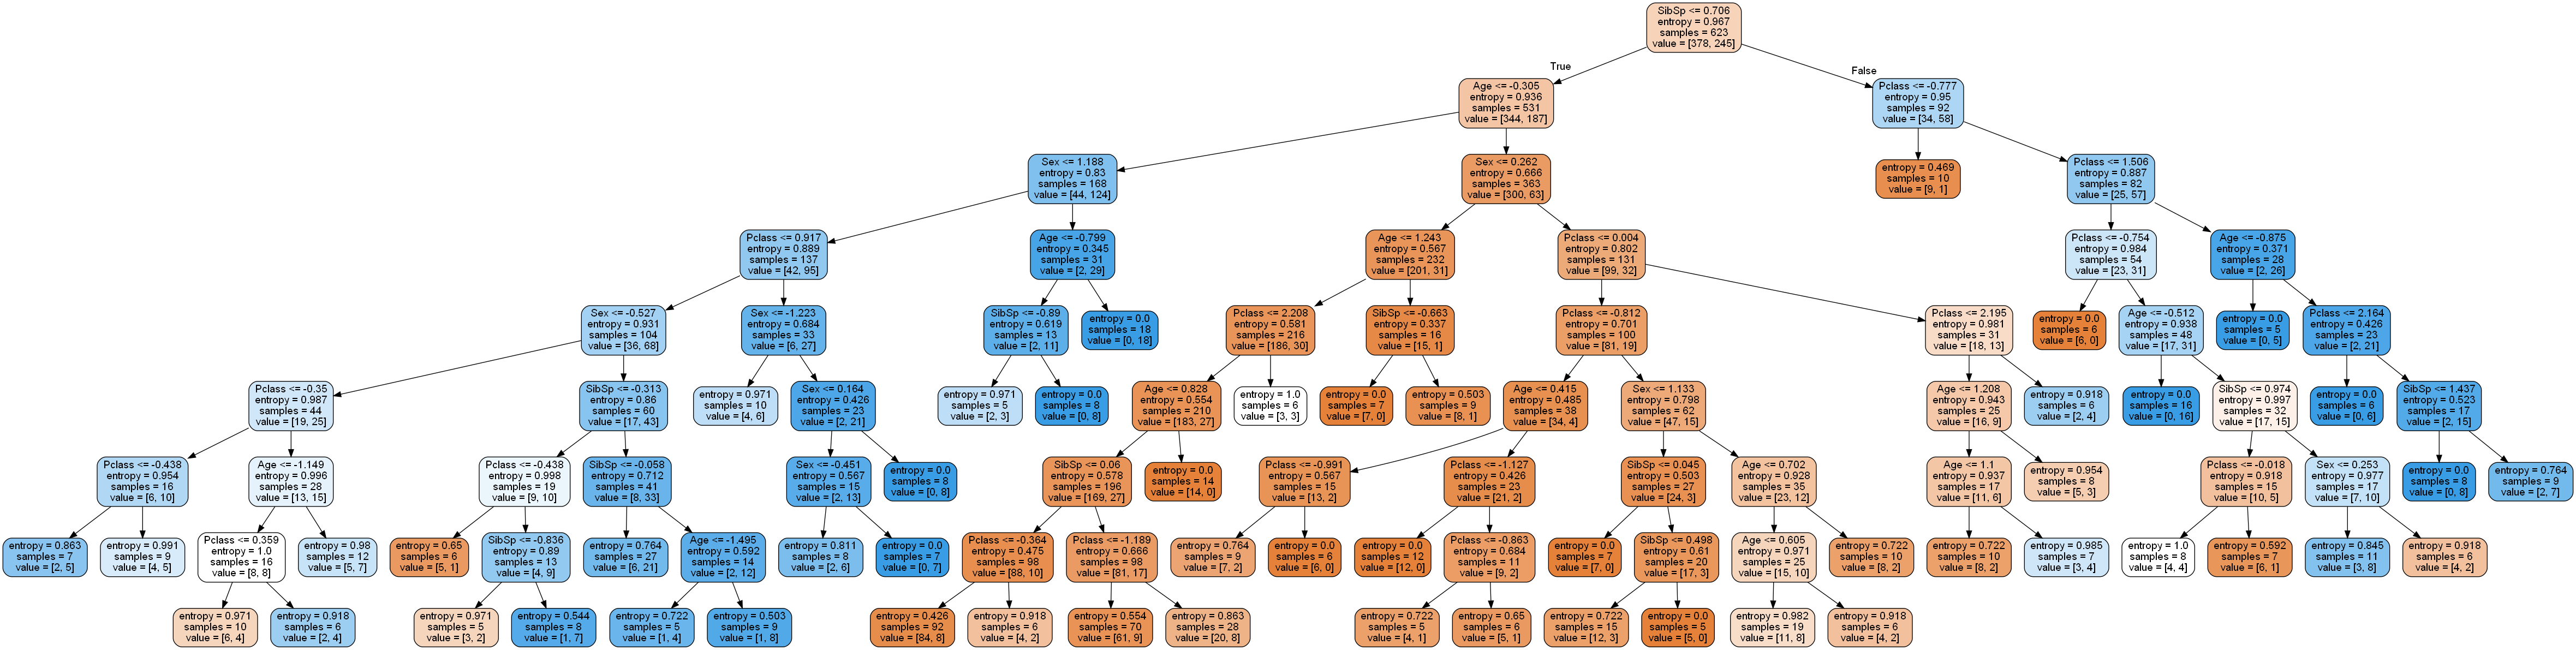

In [137]:
# create a dot_file which stores the tree structure
%matplotlib notebook
import pydotplus
dot_data = export_graphviz(clf,feature_names = feature_name[:-2],rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())


<IPython.core.display.Javascript object>


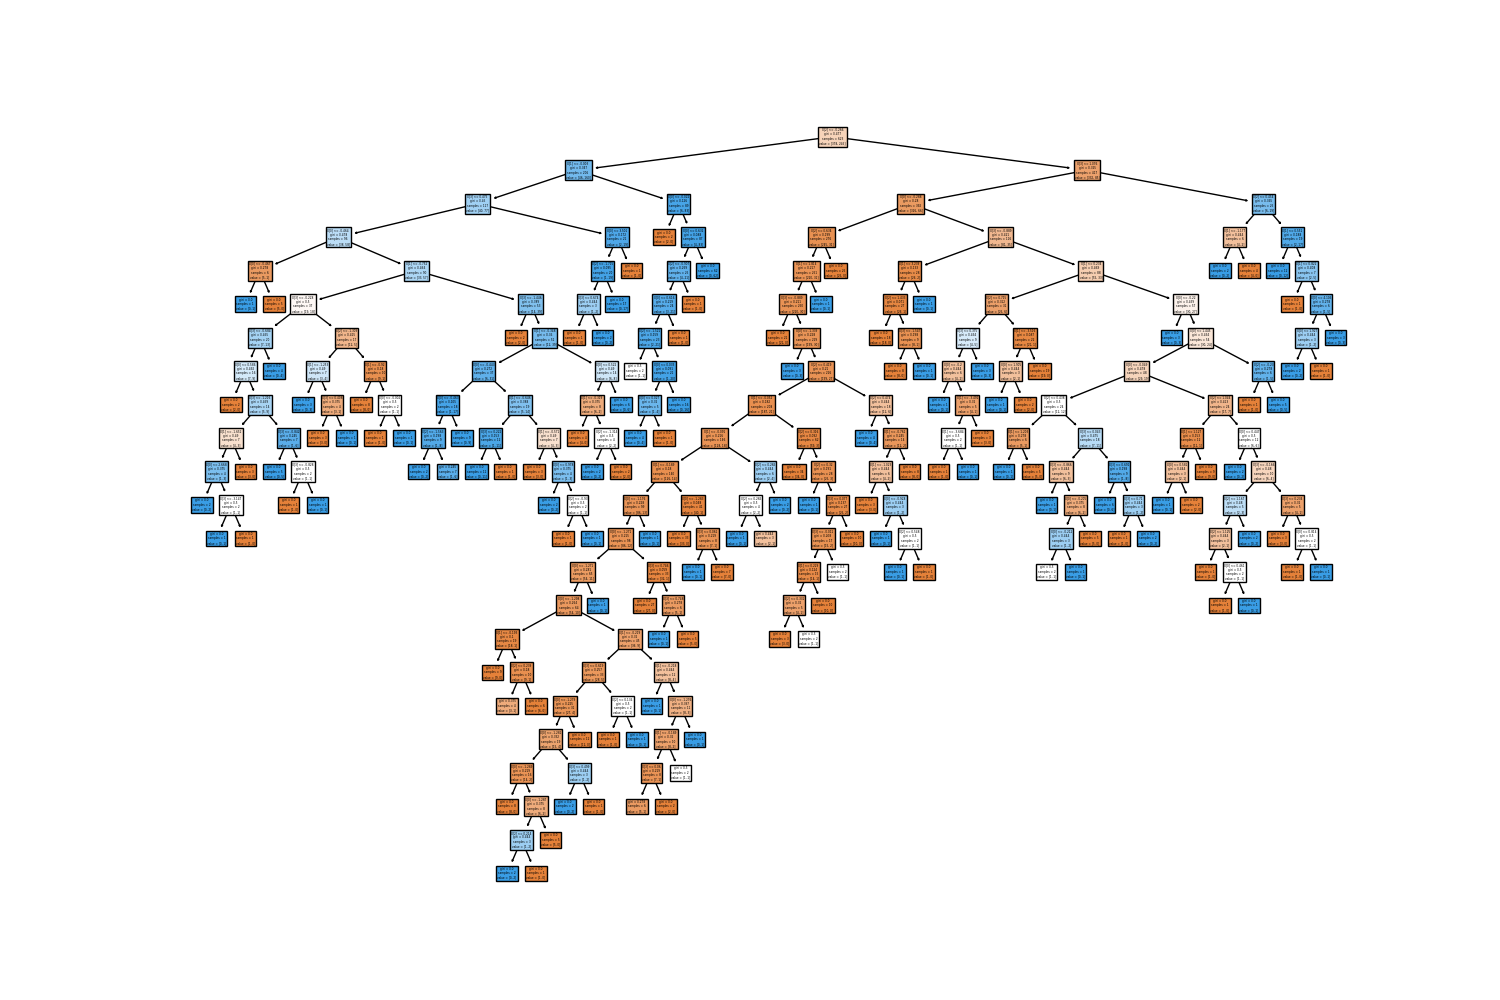

[Text(645.0498592779503, 753.2608695652174, 'X[2] <= -0.266\ngini = 0.477\nsamples = 623\nvalue = [378, 245]'),
 Text(390.5837538819876, 719.7826086956521, 'X[1] <= -0.003\ngini = 0.347\nsamples = 206\nvalue = [46, 160]'),
 Text(290.1737189440994, 686.304347826087, 'X[3] <= 0.475\ngini = 0.45\nsamples = 117\nvalue = [40, 77]'),
 Text(150.72787267080744, 652.8260869565217, 'X[0] <= -0.464\ngini = 0.478\nsamples = 96\nvalue = [38, 58]'),
 Text(72.20496894409938, 619.3478260869565, 'X[0] <= -0.467\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(57.7639751552795, 585.8695652173913, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(86.64596273291926, 585.8695652173913, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(229.25077639751552, 619.3478260869565, 'X[1] <= -0.752\ngini = 0.464\nsamples = 90\nvalue = [33, 57]'),
 Text(115.527950310559, 585.8695652173913, 'X[3] <= -0.228\ngini = 0.5\nsamples = 37\nvalue = [19, 18]'),
 Text(72.20496894409938, 552.391304347826, 'X[3] <= -0.684\ngin

In [104]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [105]:
clf.score(x_train,y_train)

0.985553772070626

In [106]:
py_pred = clf.predict(x_test)
py_pred 

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [107]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.7313432835820896

## Accuracy, Recall/Sensitivity, Precision, F1 score

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [109]:
accuracy = accuracy_score(y_test,py_pred)
accuracy

0.7313432835820896

In [87]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,py_pred)
conf_mat

array([[129,  30],
       [ 29,  80]], dtype=int64)

In [110]:
# Area Under Curve
auc = roc_auc_score(y_test, py_pred, multi_class='ovo')
auc

0.724784469765479

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, py_pred)

In [90]:
thresholds

array([2, 1, 0], dtype=int64)

In [111]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 100)

<IPython.core.display.Javascript object>


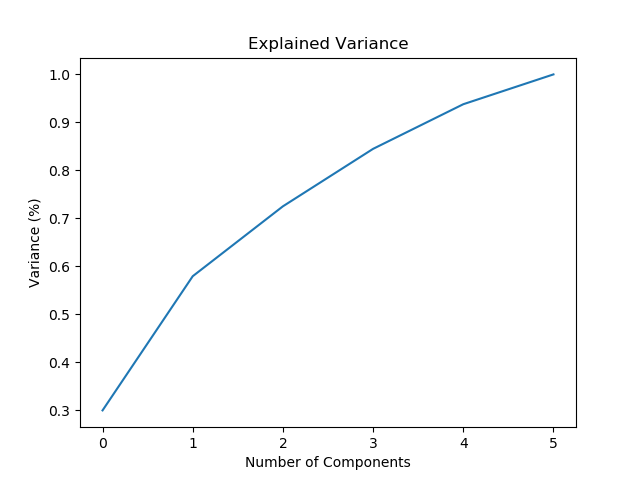

In [113]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [114]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])

In [115]:
principal_x

,PC-1,PC-2,PC-3,PC-4
0,-0.926296,-0.895259,0.557193,0.347665
1,1.497933,1.339850,-0.728178,-0.011950
2,-0.449617,-0.505489,-1.599096,-0.078296
3,1.302467,1.103392,-0.826647,0.032045
4,-1.310593,0.038177,0.295140,-0.280385
...,...,...,...,...
886,-0.771675,0.391841,0.292556,0.472903
887,0.737753,0.658127,-1.468480,0.976265
888,1.253125,-1.490482,-0.818409,-1.298678
889,-0.118524,1.115808,0.405303,0.894113


In [116]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7238805970149254

<IPython.core.display.Javascript object>


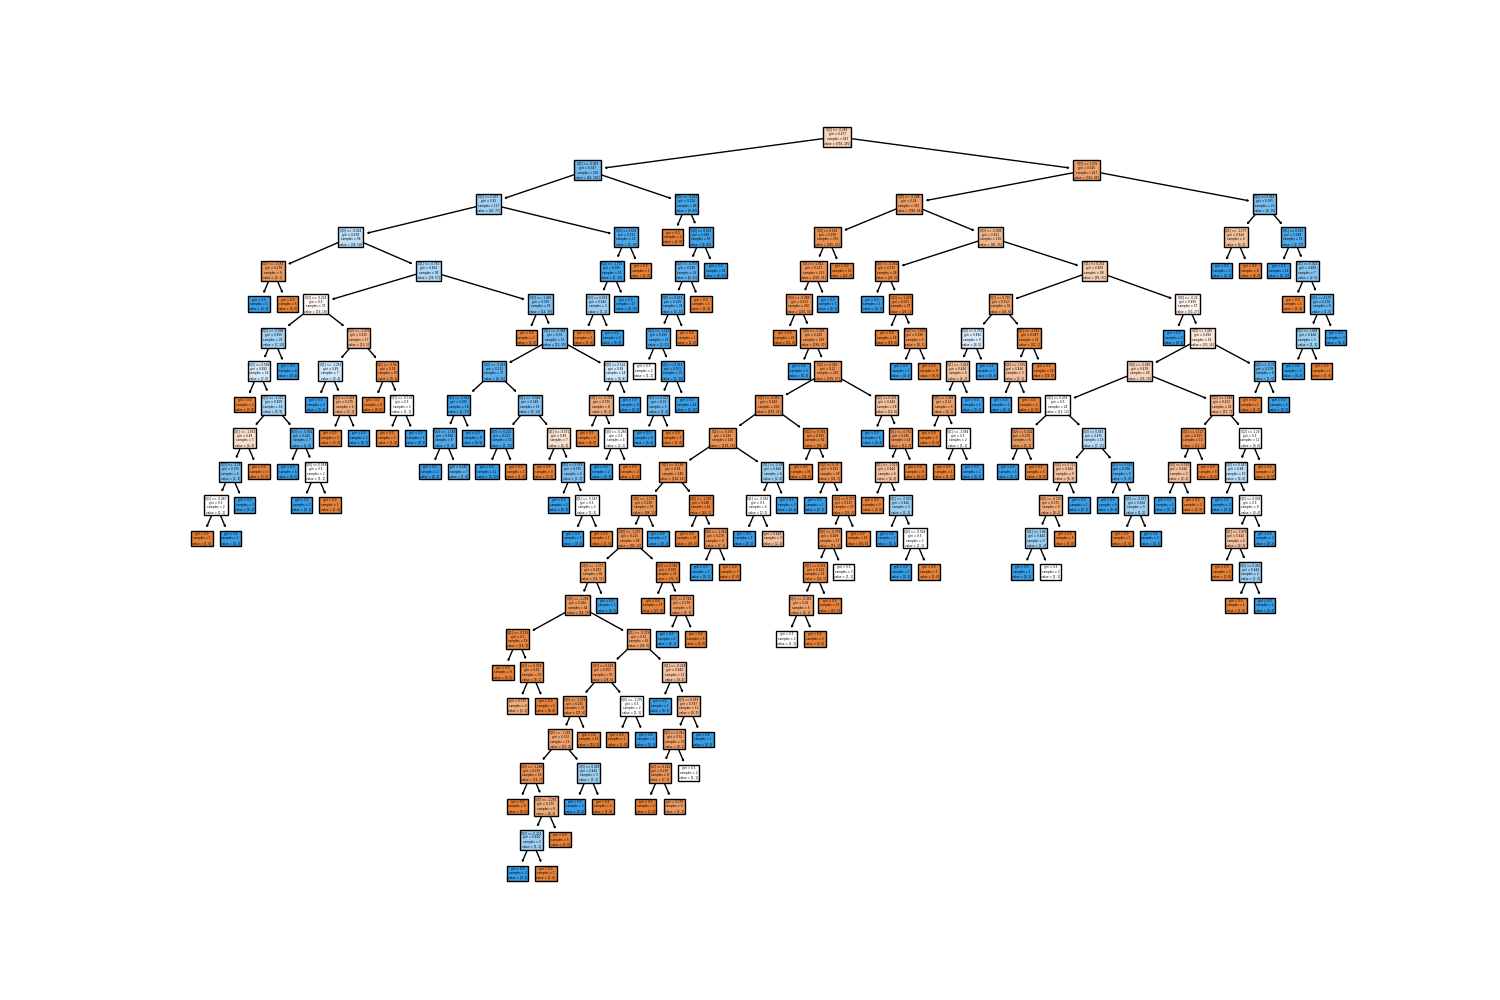

[Text(649.6159652990798, 753.2608695652174, 'X[2] <= -0.266\ngini = 0.477\nsamples = 623\nvalue = [378, 245]'),
 Text(400.0551188650307, 719.7826086956521, 'X[1] <= -0.003\ngini = 0.347\nsamples = 206\nvalue = [46, 160]'),
 Text(300.87710889570553, 686.304347826087, 'X[3] <= 0.475\ngini = 0.45\nsamples = 117\nvalue = [40, 77]'),
 Text(163.142254601227, 652.8260869565217, 'X[0] <= -0.464\ngini = 0.478\nsamples = 96\nvalue = [38, 58]'),
 Text(85.58282208588957, 619.3478260869565, 'X[2] <= -1.564\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(71.31901840490798, 585.8695652173913, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(99.84662576687117, 585.8695652173913, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(240.70168711656441, 619.3478260869565, 'X[1] <= -0.752\ngini = 0.464\nsamples = 90\nvalue = [33, 57]'),
 Text(128.37423312883436, 585.8695652173913, 'X[3] <= -0.228\ngini = 0.5\nsamples = 37\nvalue = [19, 18]'),
 Text(85.58282208588957, 552.391304347826, 'X[3] <= -0.684\ng

In [117]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [118]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [119]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [120]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [121]:
grid_search.best_score_

0.8153935483870967

In [125]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}


In [123]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =8, min_samples_leaf= 5, min_samples_split= 5, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=5,
                       min_samples_split=5, splitter='random')

In [124]:
clf.score(x_test,y_test)

0.8022388059701493